In [103]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image, display
import seaborn as sns
import PIL
import io
import math
from datasets import load_dataset
import os

In [ ]:
#!rm -fr data/compositionality-subsample
ds = load_dataset("mehdidc/compositionality-subsample", cache_dir="data/compositionality-subsample")

In [106]:
df = ds["train"].to_pandas()

<Axes: xlabel='caption_source', ylabel='count'>

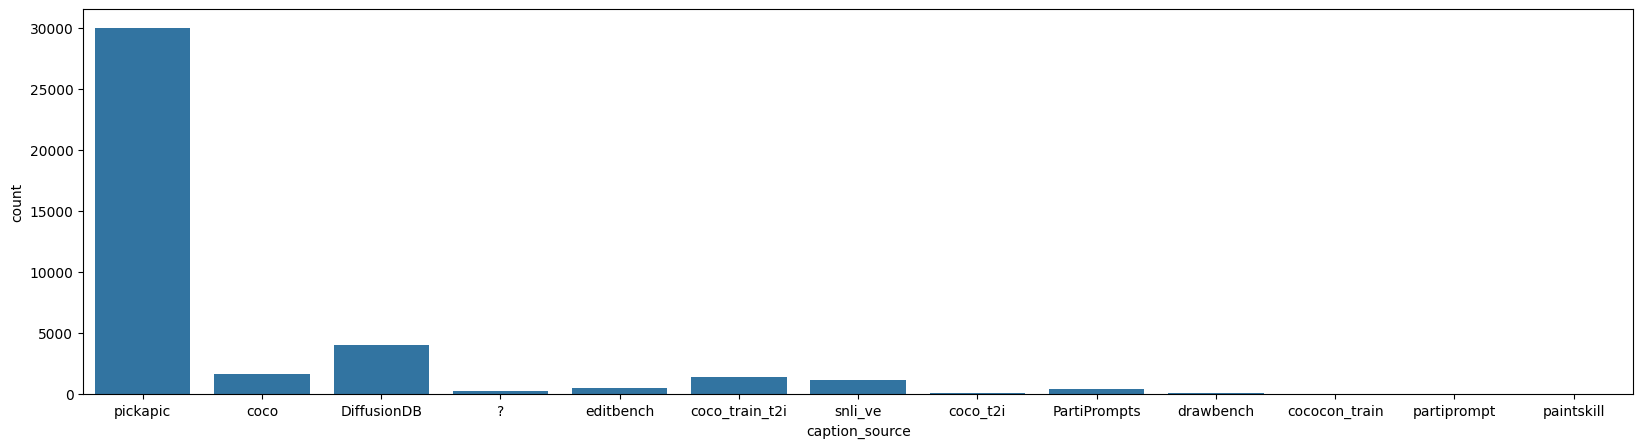

In [107]:
fig = plt.figure(figsize=(20, 5))
sns.countplot(x="caption_source", data=df)

<Axes: xlabel='model_0', ylabel='count'>

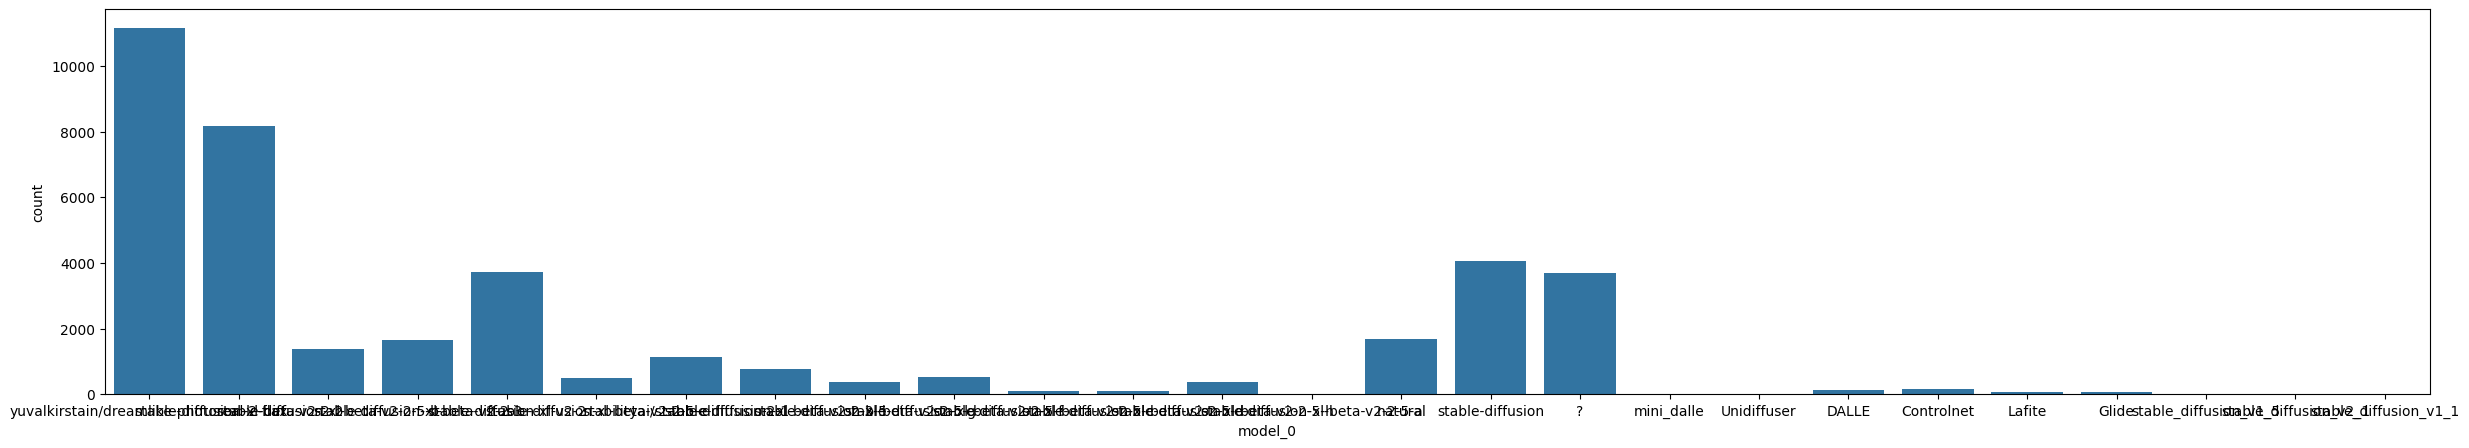

In [108]:
fig = plt.figure(figsize=(30, 5))
sns.countplot(x="model_0", data=df)

<Axes: xlabel='origin', ylabel='count'>

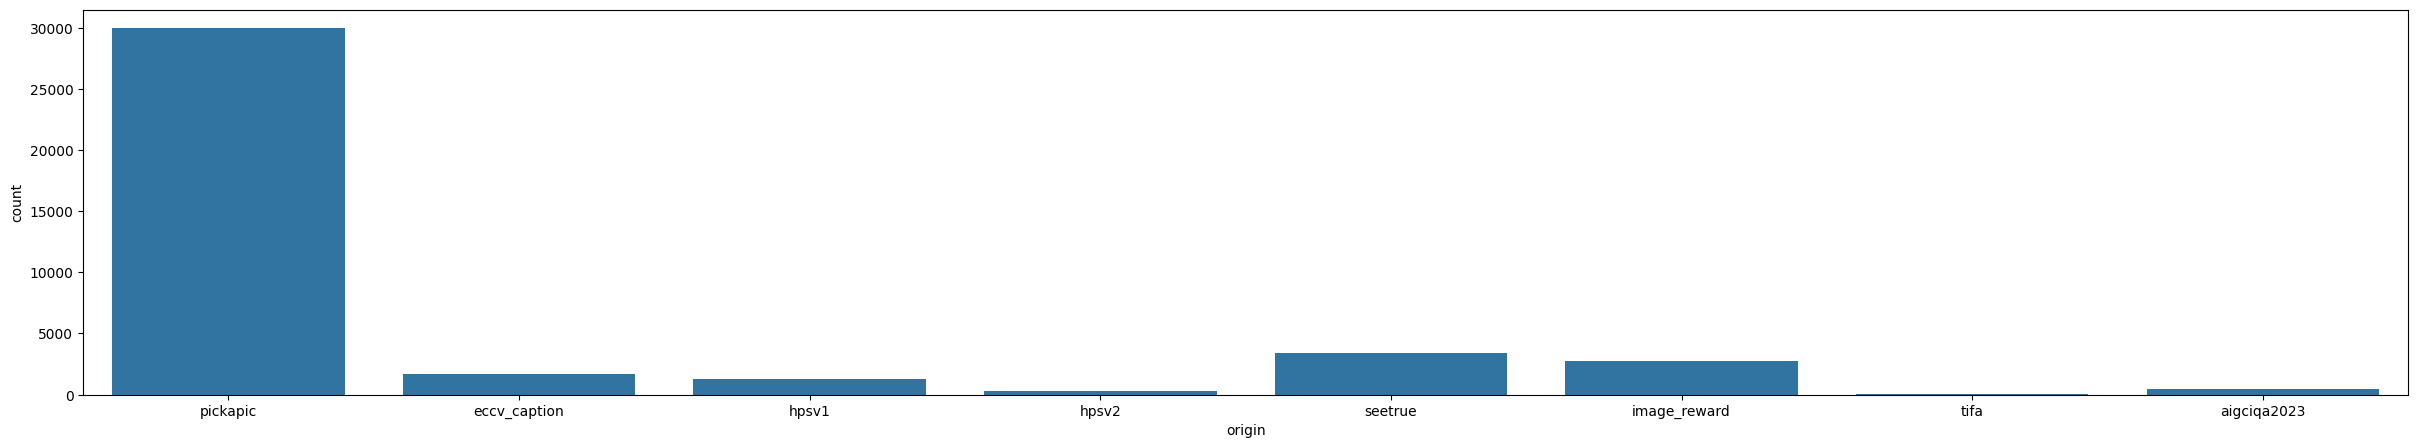

In [110]:
fig = plt.figure(figsize=(30, 5))
sns.countplot(x="origin", data=df)

(array([3.4682e+04, 4.5290e+03, 4.8000e+02, 1.5400e+02, 1.8000e+01,
        3.1000e+01, 4.0000e+00, 1.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([   0. ,  195.1,  390.2,  585.3,  780.4,  975.5, 1170.6, 1365.7,
        1560.8, 1755.9, 1951. ]),
 <BarContainer object of 10 artists>)

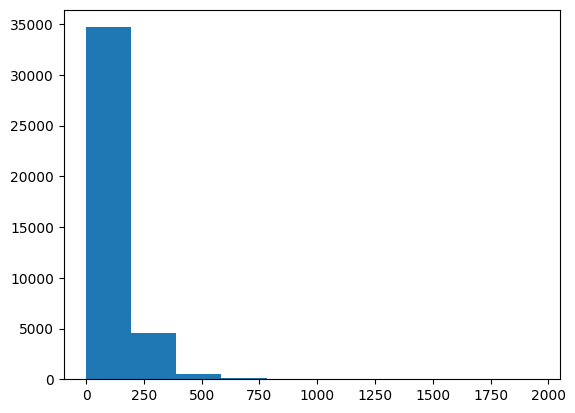

In [111]:
caption_length = df.caption.map(len)
plt.hist(caption_length)

In [112]:
def get_concat_h(im1, im2):
    dst = PIL.Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

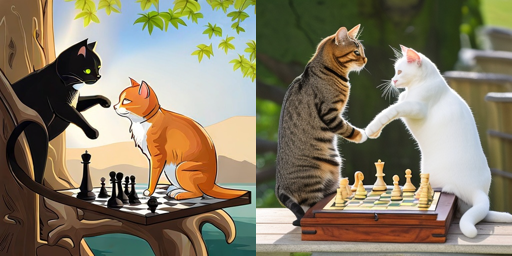

Two cats playing chess on a tree branch
> first is better


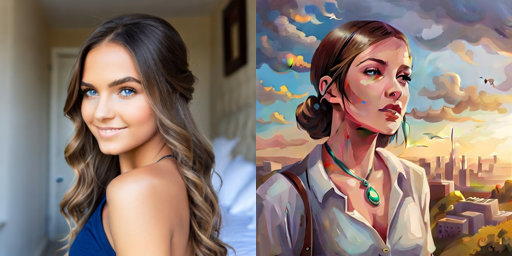

a beautiful girl
> tie


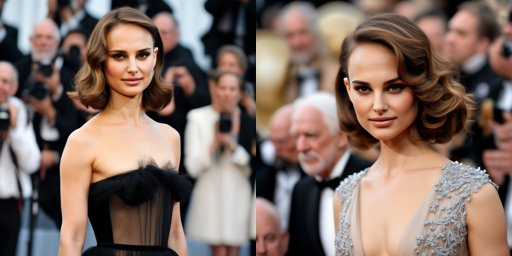

Natalie Portman
> second is better


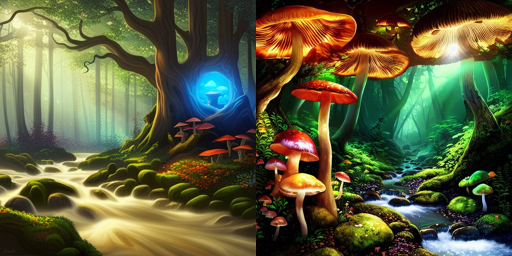

Mystical forest with glowing mushrooms and a babbling brook
> tie


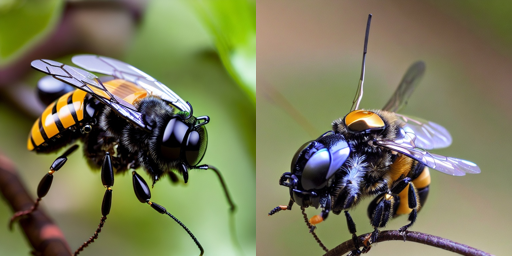

mechanical bee flying in nature, electronics, motors, wires, buttons, lcd, led instead of eyes, antennas instead of feet
> second is better


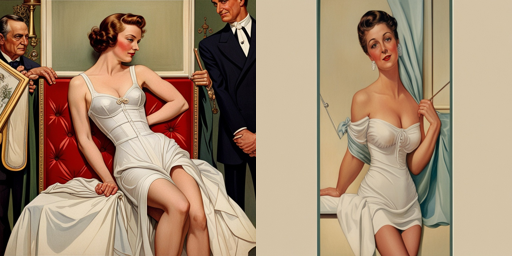

Beautiful Photo of Leyendecker, Norman Rockwell pinup girl standing perfect under wear, detailed photography
> second is better


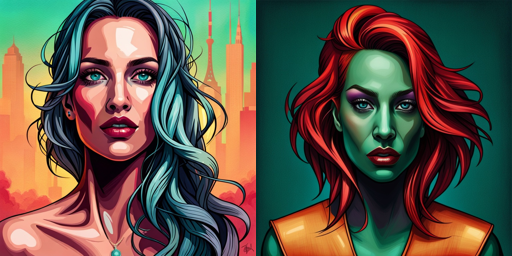

woman face fantasy painting digital hyperbeast
> first is better


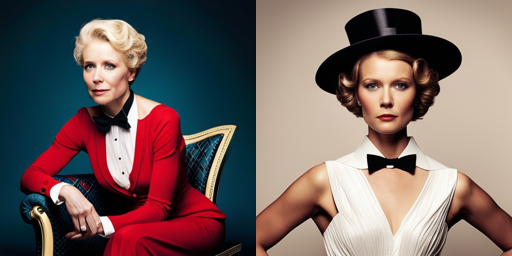

Gwyneth Paltrow dressed as Abraham Lincoln, top hat
> tie


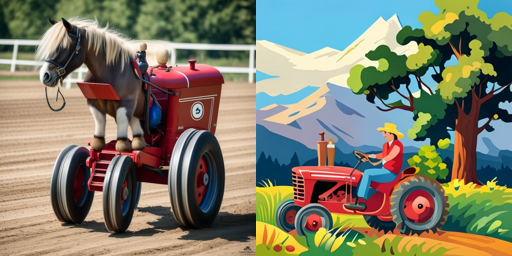

Pony driving a tractor
> first is better


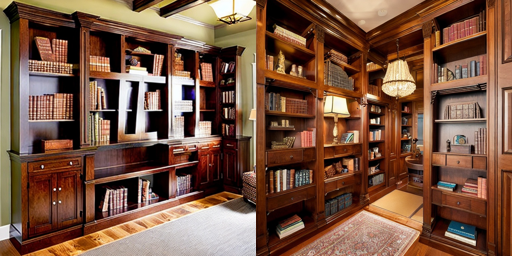

Traditional library with floor-to-ceiling bookcases
> second is better


In [113]:
sample = df.sample(10)
for _, row in sample.iterrows():
    im1 = PIL.Image.open(io.BytesIO(row.jpg_0)).resize((256, 256))
    im2 = PIL.Image.open(io.BytesIO(row.jpg_1)).resize((256, 256))
    im = get_concat_h(im1, im2)
    display(im)
    if row.label_0 > row.label_1:
        cap = "> first is better"
    elif row.label_0 < row.label_1:
        cap = "> second is better"
    else:
        cap = "> tie"
    print(row.caption)
    print(cap)